In [1]:
import pandas as pd 

dfoil=pd.read_csv("oil_reserves.csv")
dfoil

,Region,Country/ Region,2010,2011,2012,2013,2014,2015,2016
0,North America,US,34.990,39.775,44.180,48.463,54.962,47.987,47.987
1,North America,Canada,174.848,174.177,173.716,173.038,172.156,171.512,171.512
2,North America,Mexico,11.691,11.394,11.424,11.079,10.816,7.977,7.977
3,S. & Cent. America,Argentina,2.524,2.525,2.354,2.330,2.380,2.395,2.395
4,S. & Cent. America,Brazil,14.246,15.050,15.314,15.593,16.184,13.000,12.634
5,S. & Cent. America,Colombia,1.900,1.988,2.200,2.377,2.445,2.308,2.002
6,S. & Cent. America,Ecuador,6.158,7.210,8.383,8.191,8.000,8.000,8.000
7,S. & Cent. America,Peru,1.240,1.206,1.423,1.617,1.410,1.187,1.187
8,S. & Cent. America,Trinidad & Tobago,0.830,0.830,0.830,0.830,0.830,0.728,0.243
9,S. & Cent. America,Venezuela,296.501,297.571,297.735,298.350,299.953,300.878,300.978


  # PART 1


In [94]:
#Question 1 
dfoil["Max Reserve from 2014-16"]=dfoil["2014"]+dfoil["2015"]+dfoil["2016"]
ans=dfoil[dfoil["Max Reserve from 2014-16"]==dfoil["Max Reserve from 2014-16"].max()]
print(ans["Region"])

9    S. & Cent. America
Name: Region, dtype: object


In [95]:
#Question 3 

dfoil["Max Reserves"]=dfoil.loc[:,"2010":"2016"].sum(axis=1)
ans=dfoil.groupby(["Region"],sort=False)["Max Reserves"].max()
ans=pd.DataFrame(ans)
regions=dfoil["Region"].unique()
j=0
for i in regions:
    print(dfoil[(dfoil["Region"]==i)&(dfoil["Max Reserves"]==ans["Max Reserves"][j])]["Country/ Region"].values)
    j=j+1

['Canada']
['Venezuela']
['Russian Federation']
['Saudi Arabia']
['Libya']
['China']


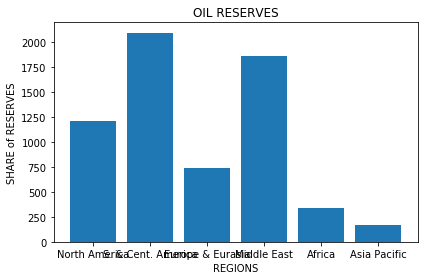

In [96]:
#Question 4 
#Run the previous cell also

import numpy as np
import matplotlib.pyplot as plt

regions=dfoil["Region"].unique()
y=ans["Max Reserves"].values
x=np.arange(len(regions))
plt.bar(x,y,label=regions)
plt.xticks(x,regions)
plt.xlabel("REGIONS")
plt.ylabel("SHARE of RESERVES")
plt.title("OIL RESERVES")
plt.tight_layout()
plt.show()

In [177]:
#Question 5 
ans=dfoil.sort_values(by=["2015"],ascending=False)
l=[]
l=ans["Country/ Region"].head().values
total=ans["2015"].sum()
print("World's top 5 countries having max oil reserve in 2015 are : " , l)
print("Their shares in percentage (%) : ")
pie_list=[]

for i in l:
    print(i,end=" : ")
    pie_list.append(((ans[ans["Country/ Region"]==i]["2015"].values)/total)*100)
    print(((ans[ans["Country/ Region"]==i]["2015"].values)/total)*100)

World's top 5 countries having max oil reserve in 2015 are :  ['Venezuela' 'Saudi Arabia' 'Canada' 'Iran' 'Iraq']
Their shares in percentage (%) : 
Venezuela : [17.78812785]
Saudi Arabia : [15.76028671]
Canada : [10.13991513]
Iran : [9.36472408]
Iraq : [8.42488179]


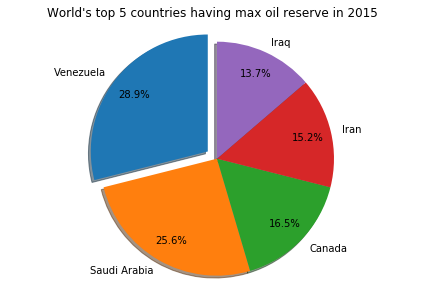

In [188]:
#Question 6

values=np.array(pie_list)
values=values.flatten()
explode=(0.1,0,0,0,0)
plt.pie(values,labels=l,startangle=90,autopct="%1.1f%%",pctdistance=0.8,shadow=True,explode=explode)
plt.tight_layout()
plt.axis("equal")
plt.title("World's top 5 countries having max oil reserve in 2015")
plt.show()

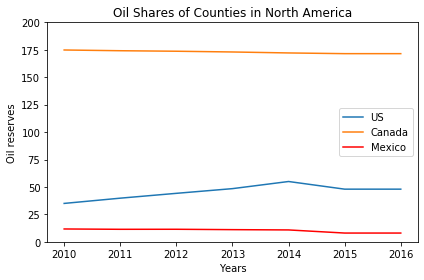

In [168]:
#Question 7
#Oil Shares of Counties in North America over the years 

ans=dfoil[dfoil["Region"]=="North America"]
countries=[]
countries=ans["Country/ Region"].values
y1=[]
y2=[]
y3=[]
y1=ans.iloc[0,2:9]
y2=ans.iloc[1,2:9]
y3=ans.iloc[2,2:9]
x=np.arange(2010,2017)

plt.ylim(0,200)
plt.plot(x,y1,label=countries[0])
plt.plot(x,y2,label=countries[1])
plt.plot(x,y3,label=countries[2],color="red")
plt.title("Oil Shares of Counties in North America")
plt.xlabel("Years")
plt.ylabel("Oil reserves")
plt.legend()
plt.tight_layout()
plt.show()

# PART 2

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("milk_production.csv")
df=df.fillna(0)

In [194]:
#Question 1

print(df[df["Cow Milk-2013-14"]==df["Cow Milk-2013-14"].max()]["State/ UT Name"].values)

['Tamil Nadu']


In [220]:
#Question 2
ans=df.sort_values(by=["Cow Milk-2010-11"],ascending=False)
ans=pd.DataFrame(ans)
print("Top 5 milk producing States in the year : ")
print("2010-11",end=" : ")
print(ans["State/ UT Name"].head().values)

ans=df.sort_values(by=["Cow Milk-2011-12"],ascending=False)
ans=pd.DataFrame(ans)
print("2011-12",end=" : ")
print(ans["State/ UT Name"].head().values)

ans=df.sort_values(by=["Cow Milk-2013-14"],ascending=False)
ans=pd.DataFrame(ans)
print("2013-14",end=" : ")
print(ans["State/ UT Name"].head().values)

ans=df.sort_values(by=["Cow Milk-2014-15"],ascending=False)
ans=pd.DataFrame(ans)
print("2014-15",end=" : ")
print(ans["State/ UT Name"].head().values)

ans=df.sort_values(by=["Cow Milk-2015-16"],ascending=False)
ans=pd.DataFrame(ans)
print("2015-16",end=" : ")
print(ans["State/ UT Name"].head().values)



Top 5 milk producing States in the year : 
2010-11 : ['Tamil Nadu' 'Uttar Pradesh' 'Rajasthan' 'Maharashtra' 'West Bengal']
2011-12 : ['Tamil Nadu' 'Uttar Pradesh' 'Rajasthan' 'Maharashtra' 'West Bengal']
2013-14 : ['Tamil Nadu' 'Uttar Pradesh' 'Rajasthan' 'Maharashtra' 'Gujarat']
2014-15 : ['Tamil Nadu' 'Uttar Pradesh' 'Rajasthan' 'Maharashtra' 'Gujarat']
2015-16 : ['Uttar Pradesh' 'Tamil Nadu' 'Rajasthan' 'Maharashtra' 'Madhya Pradesh']


In [233]:
#Question 3 
df["Total milk - cow"]=df.iloc[0:,2:7].sum(axis=1)
df["Total milk - Buffalo"]=df.iloc[0:,7:12].sum(axis=1)
df["Total mil - Goat"]=df.iloc[0:,12:].sum(axis=1)
df["Total Milk Production"]=df.iloc[0:,2:].sum(axis=1)
#Lests say the selected stated is Kerala

def avg(df,animal,state):
    animal=animal.lower()
    ans=df[df["State/ UT Name"]==state]
    ans=pd.DataFrame(ans)
    if(animal=="cow"):
        return ans["Total milk - cow"]/5
    elif animal=="buffalo":
        return ans["Total milk - Buffalo"]/5
    elif animal=="goat" :
        return ans["Total mil - Goat"]/5
    
print(avg(df,"COW","Kerala"))

12    2522.6
Name: Total milk - cow, dtype: float64


In [234]:
#Question 4

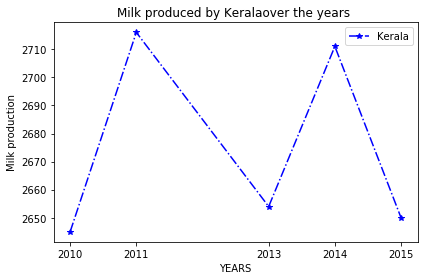

In [260]:
#Question 5
df["Total 2010-11"]=df["Cow Milk-2010-11"]+df["Boffalo Milk-2010-11"]+df["Goat Milk-2010-11"]
df["Total 2011-12"]=df["Cow Milk-2011-12"]+df["Boffalo Milk-2011-12"]+df["Goat Milk-2011-12"]
df["Total 2013-14"]=df["Cow Milk-2013-14"]+df["Boffalo Milk-2013-14"]+df["Goat Milk-2013-14"]
df["Total 2014-15"]=df["Cow Milk-2014-15"]+df["Boffalo Milk-2014-15"]+df["Goat Milk-2014-15"]
df["Total 2015-16"]=df["Cow Milk-2015-16"]+df["Boffalo Milk-2015-16"]+df["Goat Milk-2015-16"]
df

def graph(state):
    ans=df[df["State/ UT Name"]==state]
    y=ans.loc[0:,"Total 2010-11":].values
    y=y.flatten()
    x=[2010,2011,2013,2014,2015]
    plt.xticks(x)
    plt.plot(x,y,label=state,marker="*",linestyle="-.",color="blue")
    plt.xlabel("YEARS")
    plt.ylabel("Milk production")
    plt.title("Milk produced by "+state+"over the years ")
    plt.legend()
    plt.tight_layout()
    
graph("Kerala")